### Setup

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np

from setup_paths import MODELS_PATH, FIGURES_PATH
import visu
import visu_3d

sizes_short = [1] + [16*x for x in range(1, 17)]
sizes_long = ([1]
            + [16*x for x in range(1, 17)]
            + [512, 1024, 1536]
            + [1024*x for x in range(2, 16)] + [16376])
sizes_long = [1] + list(filter(lambda x: x%64 == 0, sizes_long))

### Difference (2D and 3D) between the optimization

After checking for most of the edge cases (clk (60, 60) and (480, 60), all mems, cache none and id), the results were similar each time, latency is almost halved, but no difference in maximum datarate

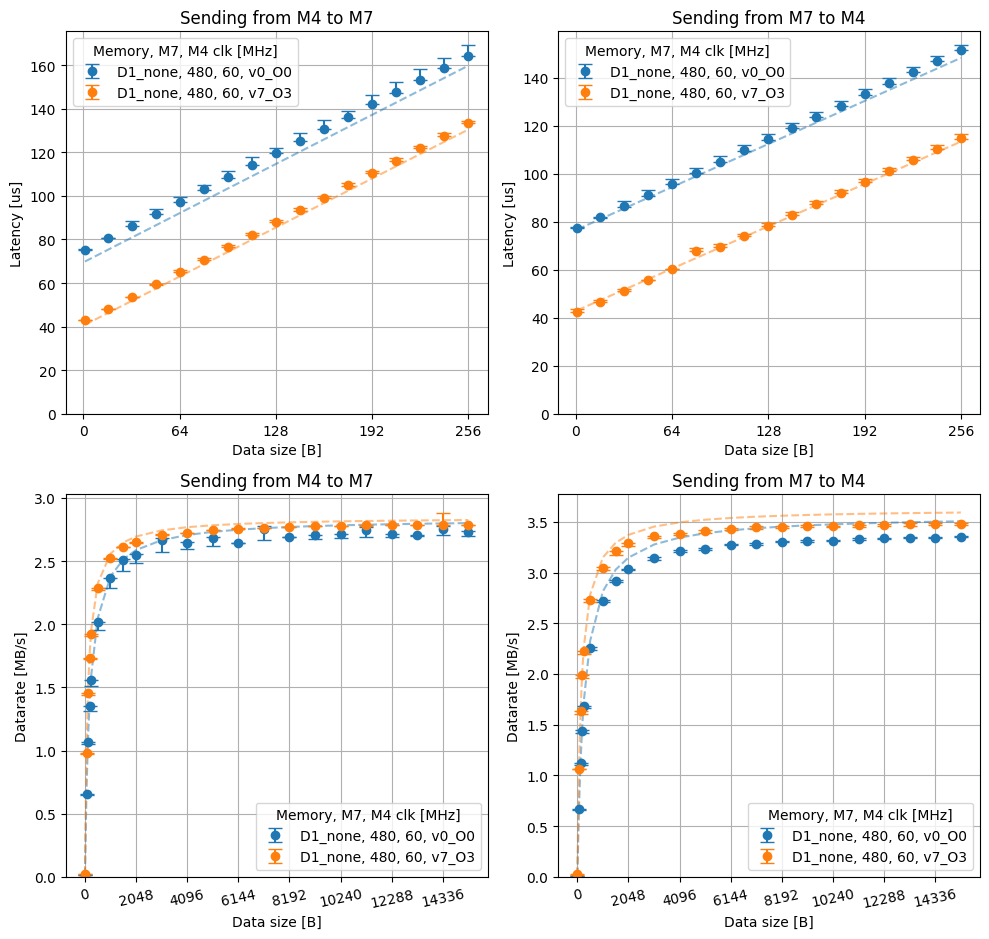

In [2]:
meas_configs = {
    'direction': ['s'],
    'clkM7': [480],
    'clkM4': [60],
    'repeat': [256],
    #datasize in loop
    'mem': ['D1'],
    'cache': ['none'],
}
base_dirs = ['v0_O0', 'v7_O3']

filename = 'release_and_length_size.pdf'
i = 0
plt.figure(figsize=(10, 9.5), layout='tight')
for meas_type, sizes in zip(['latency', 'datarate'], 
                            [sizes_short, sizes_long]):
    for direction in ['r', 's']:
        meas_configs['direction'] = direction
        meas_configs['datasize'] = sizes
        ax = plt.subplot(221 + i)
        if sizes == sizes_long:
            plt.xticks(np.arange(9)*2048, rotation=12)
        else:
            plt.xticks(np.arange(5)*64)
        visu.final_size_func_foreach(
            meas_configs, base_dirs, meas_type,
            if_model=True)
        i = i + 1
out = os.path.join(FIGURES_PATH, filename)
if not os.path.exists(out):
    plt.savefig(out)

### Change in clk

* size plot 4 regular plots for change in m4 and m7 as well


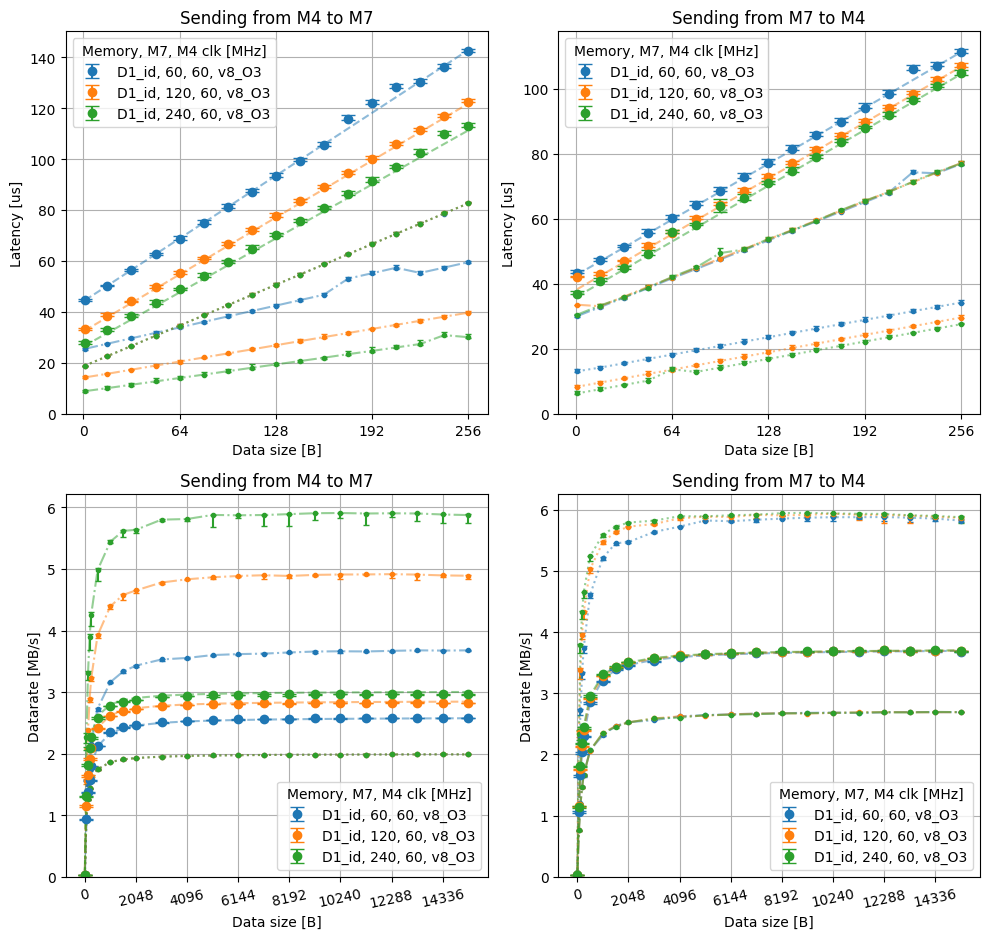

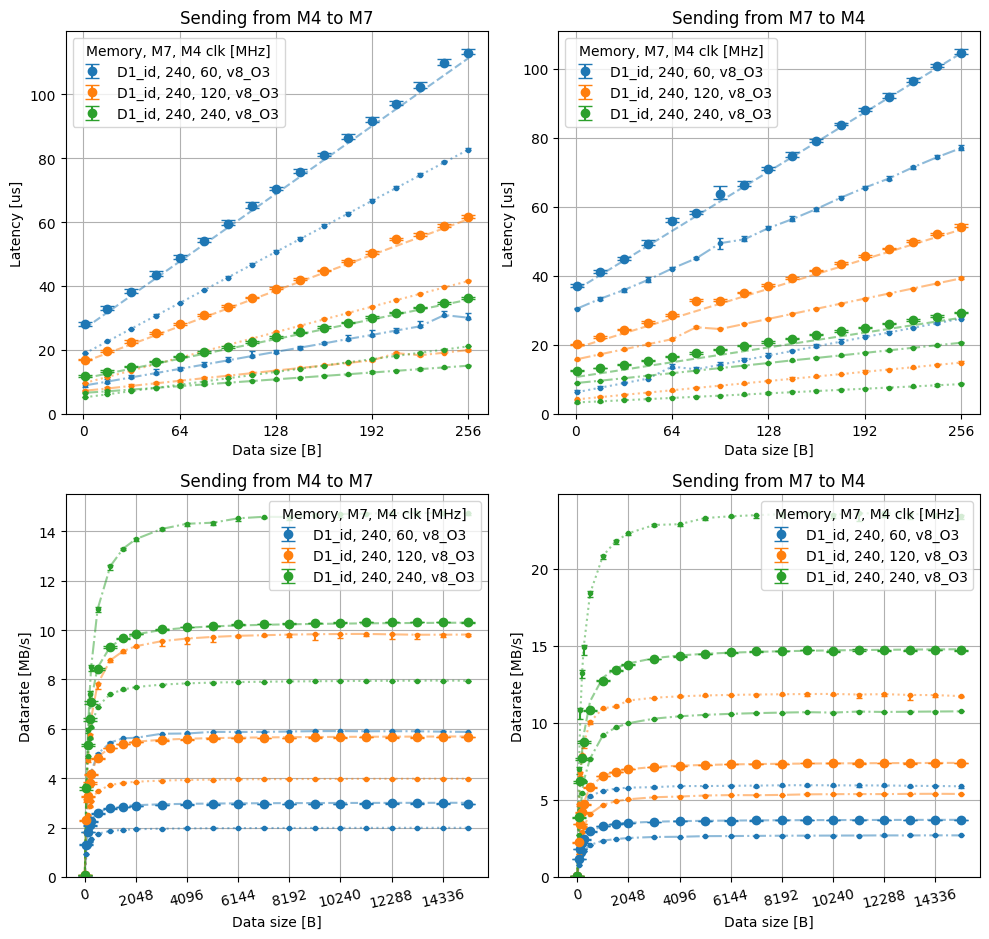

In [10]:
clkM7s = [[240, 120, 60], [240]]
clkM4s = [[60], [240, 120, 60]]
base_dirs = ['v8_O3']
filenames = ['clock_m7_size.pdf', 'clock_m4_size.pdf']

meas_configs = {
    # direction in loop
    # clkM4 in loop
    # clkM7 in loop
    'repeat': [256],
    # datasize in loop
    'mem': ['D1'],
    'cache': ['id'],
}
for filename, clkM7, clkM4 in zip(filenames, clkM7s, clkM4s):
    i = 0
    plt.figure(figsize=(10, 9.5), layout='tight')
    for meas_type, sizes in zip(['latency', 'datarate'], 
                                [sizes_short, sizes_long]):
        for direction in ['r', 's']:
            meas_configs['direction'] = direction
            meas_configs['datasize'] = sizes
            meas_configs['clkM4'] = clkM4
            meas_configs['clkM7'] = clkM7
            ax = plt.subplot(221 + i)
            if sizes == sizes_long:
                plt.xticks(np.arange(9)*2048, rotation=12)
            else:
                plt.xticks(np.arange(5)*64)
            visu.final_size_func_foreach(
                meas_configs, base_dirs, meas_type,
                if_model=True, if_mid_checkpoint=True)
            i = i + 1
    out = os.path.join(FIGURES_PATH, filename)
    if not os.path.exists(out):
        plt.savefig(out)

### Difference between mems

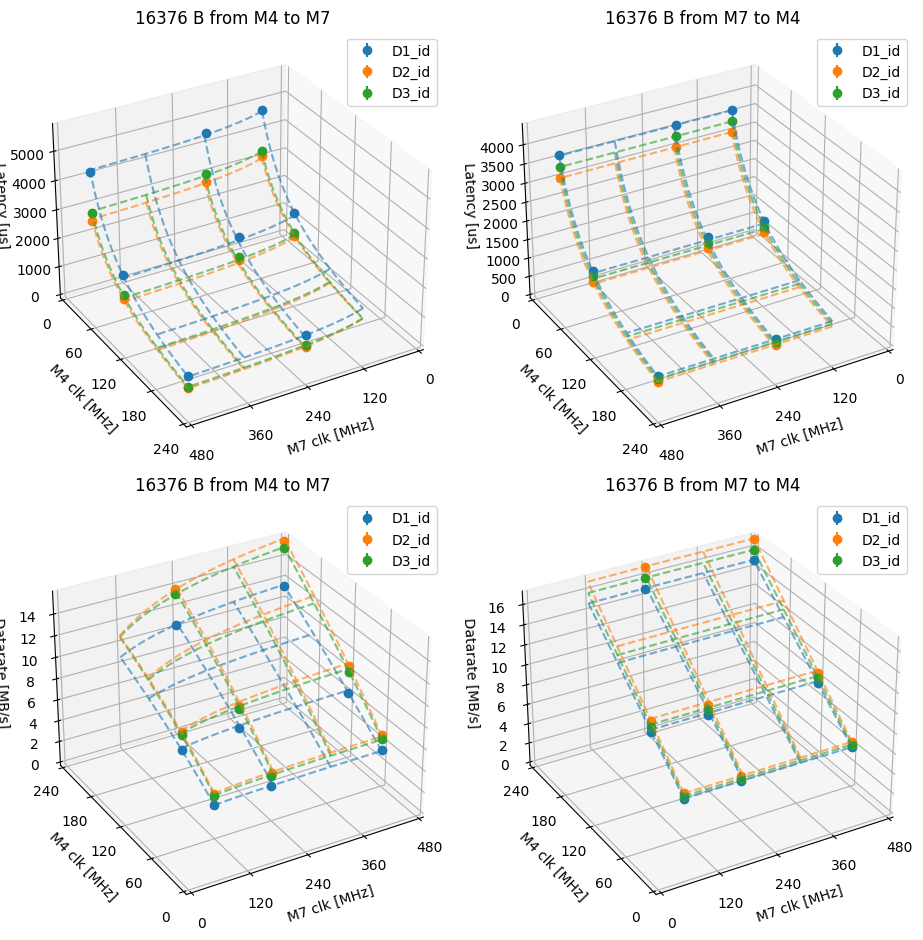

In [4]:
import visu_3d
import os
import matplotlib.pyplot as plt
from setup_paths import FIGURES_PATH
meas_configs = {
    # direction in loop
    'clkM7': [120, 240, 480],
    'clkM4': [60, 120, 240],
    'repeat': [256],
    'datasize': [16376],
    'mem': ['D1', 'D2', 'D3'],
    'cache': ['id'],
}
base_dir = 'v7_O3'
filename = 'memories_cache_3d.pdf'

i = 0
fig = plt.figure(figsize=(10, 9.5), layout='tight')
for meas_type in ['latency', 'datarate']:
    for direction in ['r', 's']:
        meas_configs['direction'] = direction
        ax = fig.add_subplot(221 + i, projection='3d')
        visu_3d.final3d_foreach(meas_configs, base_dir, meas_type, ax,
                                if_cut=False, linecount=3)
        i = i + 1
out = os.path.join(FIGURES_PATH, filename)
if not os.path.exists(out):
    plt.savefig(out)

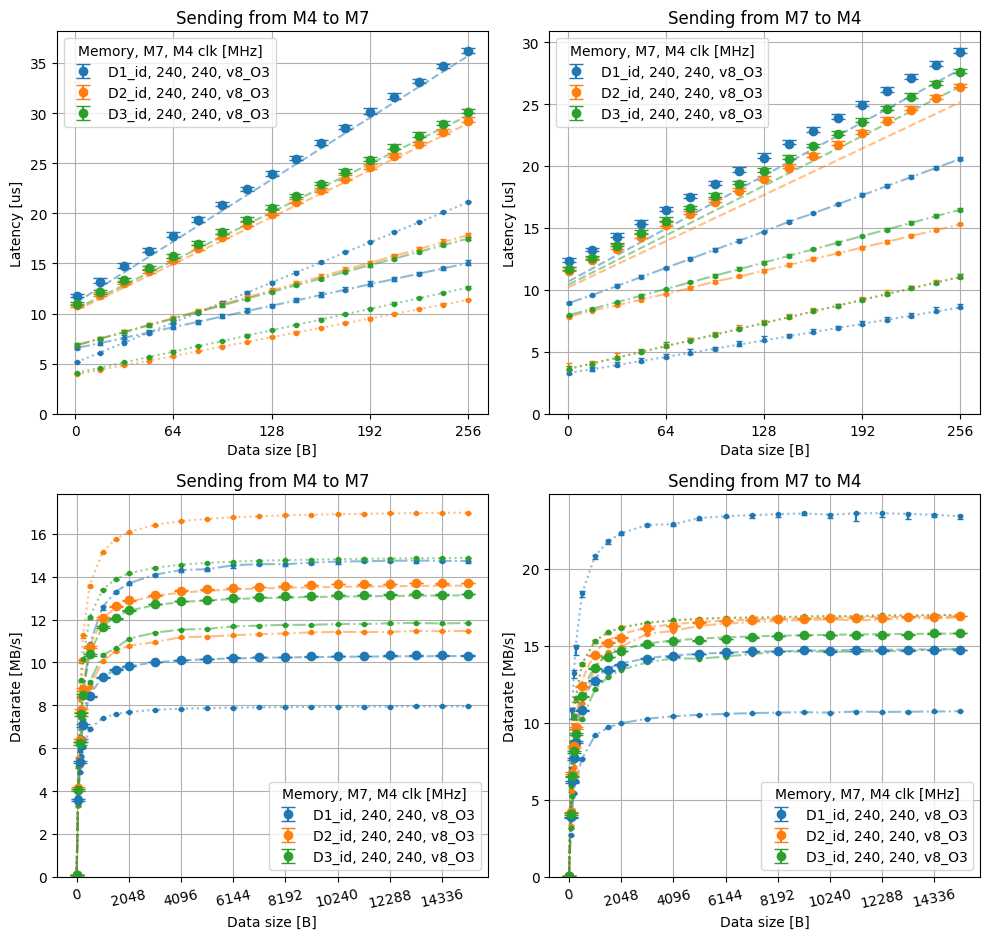

In [9]:
meas_configs = {
    # direction in loop
    'clkM7': [240],
    'clkM4': [240],
    'repeat': [256],
    # datasize in loop
    'mem': ['D1', 'D2', 'D3'],
    'cache': ['id'],
}
base_dir = 'v8_O3'
filename = 'mems_size.pdf'

i = 0
plt.figure(figsize=(10, 9.5), layout='tight')
for meas_type, sizes in zip(['latency', 'datarate'], 
                            [sizes_short, sizes_long]):
    for direction in ['r', 's']:
        meas_configs['direction'] = direction
        meas_configs['datasize'] = sizes
        ax = plt.subplot(221 + i)
        if sizes == sizes_long:
            plt.xticks(np.arange(9)*2048, rotation=12)
        else:
            plt.xticks(np.arange(5)*64)
        visu.final_size_func_foreach(
            meas_configs, base_dirs, meas_type,
            if_model=True, if_mid_checkpoint=True)
        i = i + 1
out = os.path.join(FIGURES_PATH, filename)
if not os.path.exists(out):
    plt.savefig(out)

### Difference between caches

On 3D, there is a small difference for D1 (large sizes), same as next plot, D2, D3 doesn't show much

Here with the D1 plot, it can be seen, how the two surfaces open up ((none, i) and (d, id))

These plots can be used only to check the correlation with the clock frequencies, then the size plots are more useful

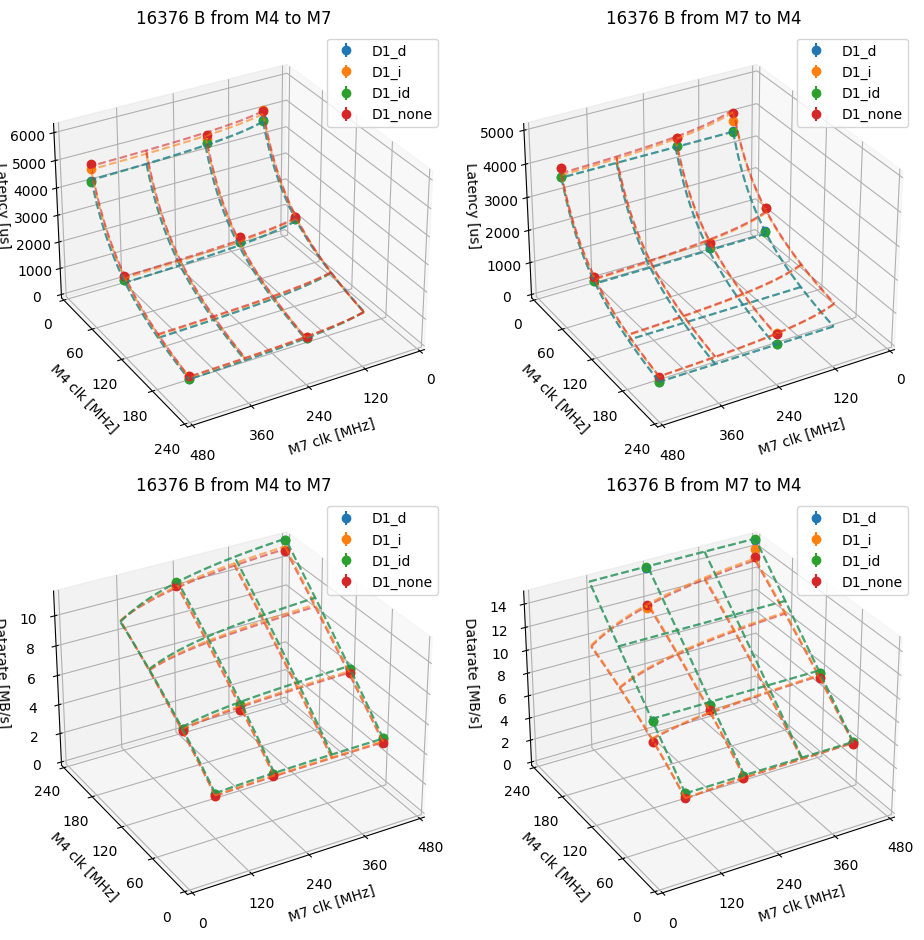

In [6]:
import visu_3d
import os
import matplotlib.pyplot as plt
from setup_paths import FIGURES_PATH
meas_configs = {
    # direction in loop
    'clkM7': [120, 240, 480],
    'clkM4': [60, 120, 240],
    'repeat': [256],
    'datasize': [16376],
    'mem': ['D1'],
    'cache': ['none', 'i', 'd', 'id'],
}
base_dir = 'v7_O3'
filename = 'memories_cache_3d.pdf'

i = 0
fig = plt.figure(figsize=(10, 9.5), layout='tight')
for meas_type in ['latency', 'datarate']:
    for direction in ['r', 's']:
        meas_configs['direction'] = direction
        ax = fig.add_subplot(221 + i, projection='3d')
        visu_3d.final3d_foreach(meas_configs, base_dir, meas_type, ax,
                                if_cut=False, linecount=3)
        i = i + 1
out = os.path.join(FIGURES_PATH, filename)
if not os.path.exists(out):
    plt.savefig(out)

D2 and D3 are similar, cache doesn't change the max datarate, but D1 data cache does speed it up. Latency is basically the same in all cases

When changing m7 clk:
* m7 to m4: the speed with d cache stays the same, the others speed up
* m4 to m7: both speeds up similarly

todo analyze

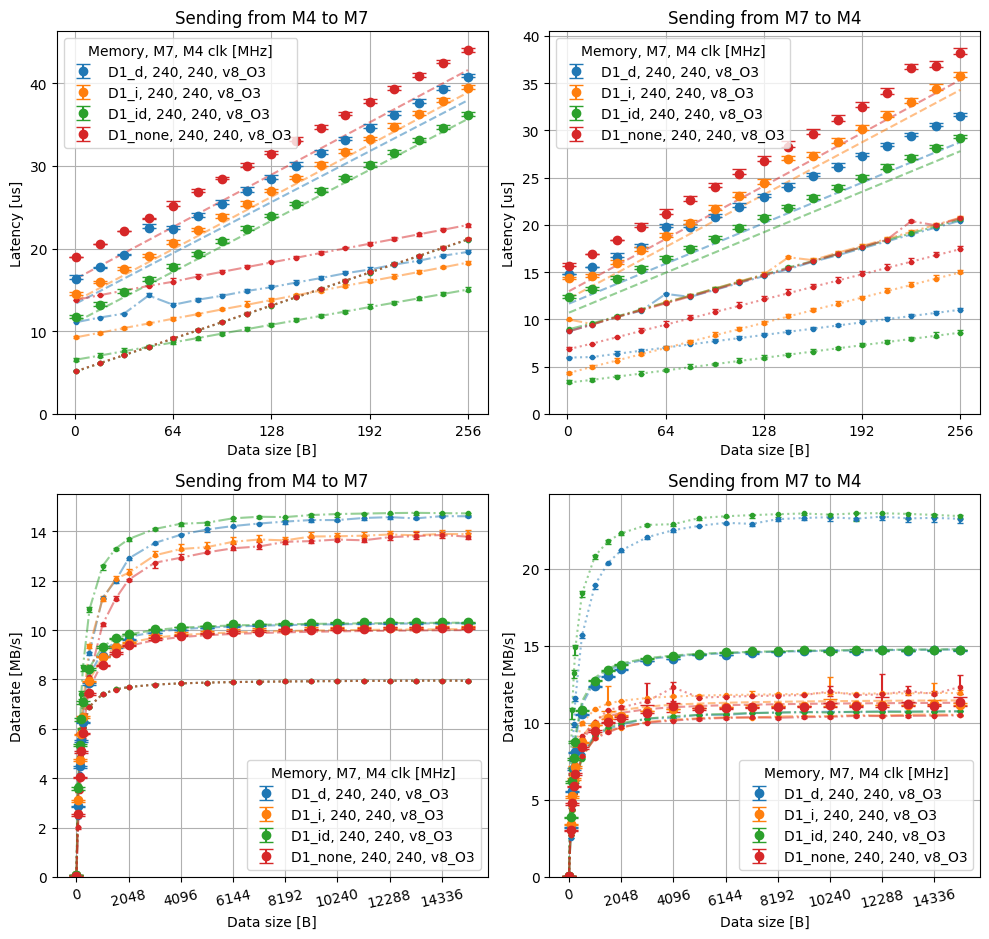

In [7]:
meas_configs = {
    # direction in loop
    'clkM7': [240],
    'clkM4': [240],
    'repeat': [256],
    # datasize in loop
    'mem': ['D1'],
    'cache': ['none', 'i', 'd', 'id'],
}
base_dir = 'v7_O3'
filename = 'cache_size.pdf'

i = 0
plt.figure(figsize=(10, 9.5), layout='tight')
for meas_type, sizes in zip(['latency', 'datarate'], 
                            [sizes_short, sizes_long]):
    for direction in ['r', 's']:
        meas_configs['direction'] = direction
        meas_configs['datasize'] = sizes
        ax = plt.subplot(221 + i)
        if sizes == sizes_long:
            plt.xticks(np.arange(9)*2048, rotation=12)
        else:
            plt.xticks(np.arange(5)*64)
        visu.final_size_func_foreach(
            meas_configs, base_dirs, meas_type,
            if_model=True, if_mid_checkpoint=True)
        i = i + 1
out = os.path.join(FIGURES_PATH, filename)
if not os.path.exists(out):
    plt.savefig(out)

### Mem and cache configurations

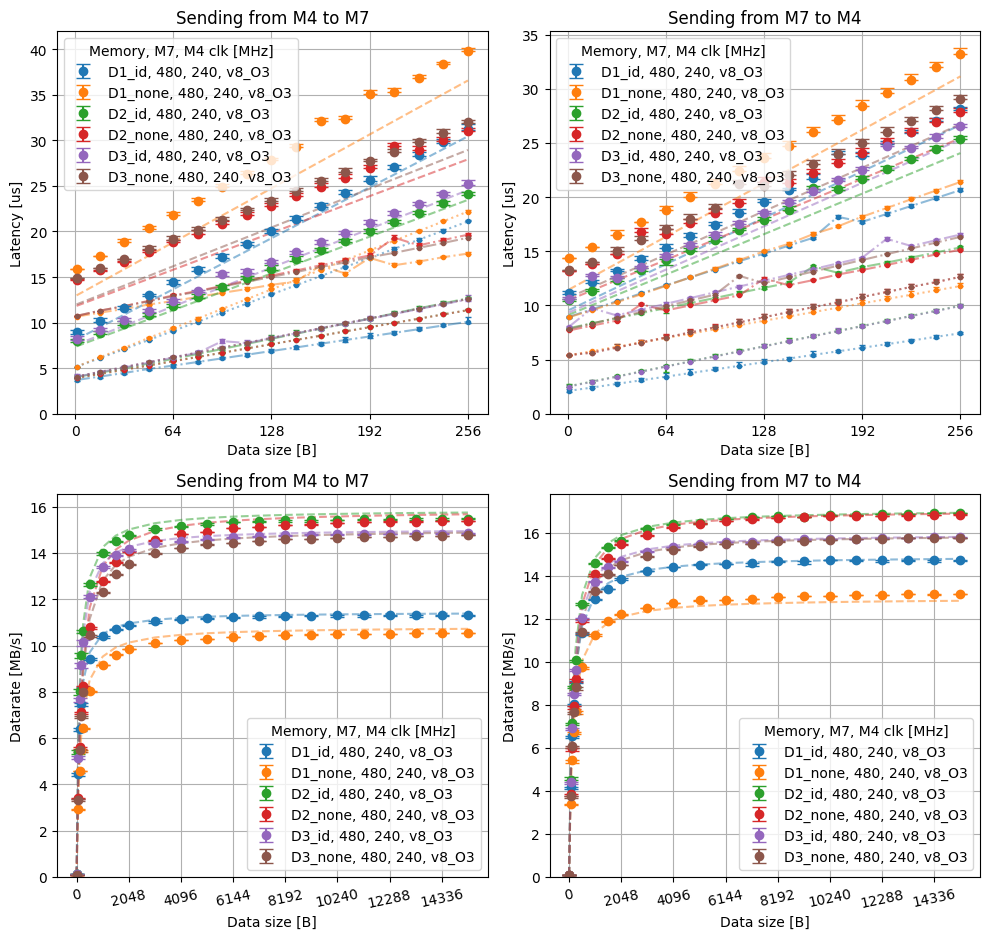

In [8]:
meas_configs = {
    # direction in loop
    'clkM7': [480],
    'clkM4': [240],
    'repeat': [256],
    # datasize in loop
    'mem': ['D1', 'D2', 'D3'],
    'cache': ['none', 'id'],
}
base_dir = 'v7_O3'
filename = 'all_mems_size.pdf'

i = 0
plt.figure(figsize=(10, 9.5), layout='tight')
for meas_type, sizes in zip(['latency', 'datarate'], 
                            [sizes_short, sizes_long]):
    for direction in ['r', 's']:
        meas_configs['direction'] = direction
        meas_configs['datasize'] = sizes
        ax = plt.subplot(221 + i)
        if sizes == sizes_long:
            plt.xticks(np.arange(9)*2048, rotation=12)
        else:
            plt.xticks(np.arange(5)*64)
        visu.final_size_func_foreach(
            meas_configs, base_dirs, meas_type,
            if_model=True, if_mid_checkpoint=(meas_type=='latency'))
        i = i + 1
out = os.path.join(FIGURES_PATH, filename)
if not os.path.exists(out):
    plt.savefig(out)

### Debug instrumentation

todo